In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
url='https://raw.githubusercontent.com/adichouhan14/Covid-Project/master/dataset2/covid-data.csv'
df=pd.read_csv(url)


In [3]:
df.shape

(36347, 36)

In [4]:
df.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
count,3.600200e+04,36002.000000,36002.000000,36002.000000,35938.000000,35938.000000,35938.000000,35938.000000,11285.000000,1.163700e+04,...,32499.000000,32260.00000,21580.000000,32693.000000,33796.000000,25857.000000,25543.000000,15052.000000,29669.000000,35839.000000
mean,6.125405e+04,1129.401200,2987.085579,41.242875,1263.182969,19.278484,44.804142,0.540597,18116.560124,9.308703e+05,...,5.953032,21363.33221,11.670658,250.012445,8.040680,10.948717,32.628184,52.998131,3.136582,74.178512
std,6.289881e+05,10451.597797,28169.969755,355.187465,2952.454228,64.454675,128.057141,2.931087,66690.110439,3.751930e+06,...,4.350464,20636.95037,18.880010,117.810806,4.127222,10.498481,13.349278,31.506510,2.541745,7.332932
min,0.000000e+00,-2461.000000,0.000000,-1918.000000,0.000000,-265.189000,0.000000,-41.023000,-3743.000000,1.000000e+00,...,0.526000,661.24000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000
25%,2.500000e+01,0.000000,0.000000,0.000000,11.430000,0.000000,0.000000,0.000000,858.000000,3.173700e+04,...,2.155000,5819.49500,0.500000,153.493000,5.310000,1.900000,21.400000,22.863000,1.380000,70.260000
50%,5.790000e+02,6.000000,10.000000,0.000000,195.796000,0.943000,2.743000,0.000000,2983.000000,1.325890e+05,...,4.455000,14600.86100,1.800000,237.372000,7.110000,6.434000,31.400000,55.182000,2.540000,75.800000
75%,6.510250e+03,119.000000,126.000000,2.000000,1133.302500,12.000000,26.221000,0.157000,10380.000000,5.169590e+05,...,9.720000,32605.90600,15.000000,318.949000,10.180000,19.600000,40.900000,83.741000,4.210000,80.070000
max,2.033035e+07,298085.000000,742413.000000,10504.000000,39445.898000,4944.376000,1237.551000,200.040000,926876.000000,6.179257e+07,...,18.493000,116935.60000,77.600000,724.417000,23.360000,44.000000,78.100000,98.999000,13.800000,86.750000


In [5]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [6]:
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
36342,NaN,NaN,International,2020-02-28,705.0,0.0,4.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36343,NaN,NaN,International,2020-02-29,705.0,0.0,6.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36344,NaN,NaN,International,2020-03-01,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36345,NaN,NaN,International,2020-03-02,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36346,NaN,NaN,International,2020-03-10,696.0,-9.0,7.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.isnull().sum()

iso_code                              64
continent                            290
location                               0
date                                   0
total_cases                          345
new_cases                            345
total_deaths                         345
new_deaths                           345
total_cases_per_million              409
new_cases_per_million                409
total_deaths_per_million             409
new_deaths_per_million               409
new_tests                          25062
total_tests                        24710
total_tests_per_thousand           24710
new_tests_per_thousand             25062
new_tests_smoothed                 23654
new_tests_smoothed_per_thousand    23654
tests_per_case                     24506
positive_rate                      24157
tests_units                        22908
stringency_index                    6649
population                            64
population_density                  1661
median_age      

In [8]:
india_case=df[df['location']=='India']

In [9]:
df.describe(include='O')

,iso_code,continent,location,date,tests_units
count,36283,36057,36347,36347,13439
unique,211,6,212,226,5
top,ISR,Europe,United States,2020-06-30,tests performed
freq,226,9833,226,211,7001


In [10]:
india_case.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
15223,IND,Asia,India,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15224,IND,Asia,India,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15225,IND,Asia,India,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15226,IND,Asia,India,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15227,IND,Asia,India,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


In [11]:
india_case.tail()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
15443,IND,Asia,India,2020-08-08,2088611.0,61537.0,42518.0,933.0,1513.481,44.592,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15444,IND,Asia,India,2020-08-09,2153010.0,64399.0,43379.0,861.0,1560.147,46.666,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15445,IND,Asia,India,2020-08-10,2215074.0,62064.0,44386.0,1007.0,1605.121,44.974,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15446,IND,Asia,India,2020-08-11,2268675.0,53601.0,45257.0,871.0,1643.962,38.841,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15447,IND,Asia,India,2020-08-12,2329638.0,60963.0,46091.0,834.0,1688.138,44.176,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


### Visualize total confirmed cases in India

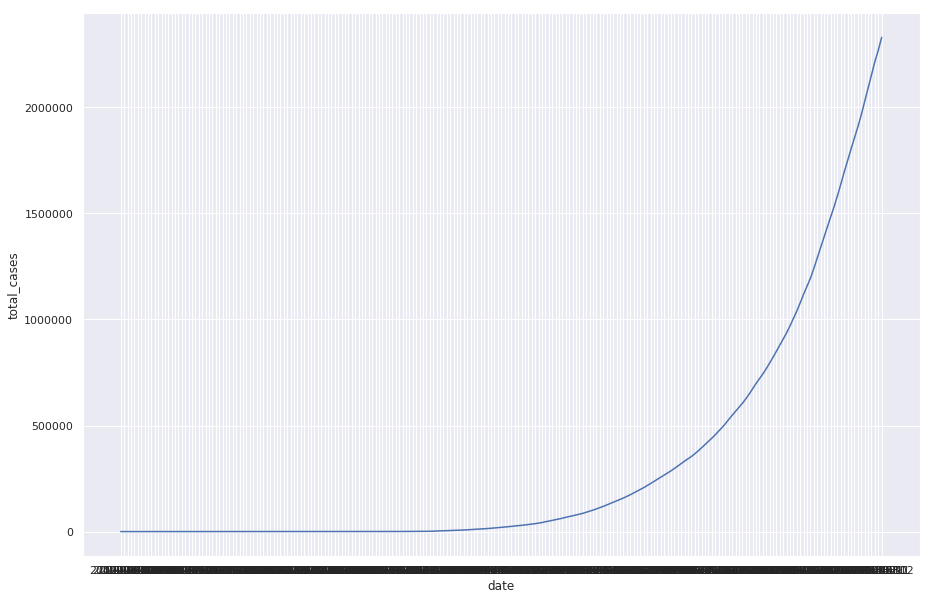

In [12]:
sb.set(rc={'figure.figsize':(15,10)})
sb.lineplot(x='date',y='total_cases',data=india_case)
plt.show()

### Visualize total confirmed cases last month India

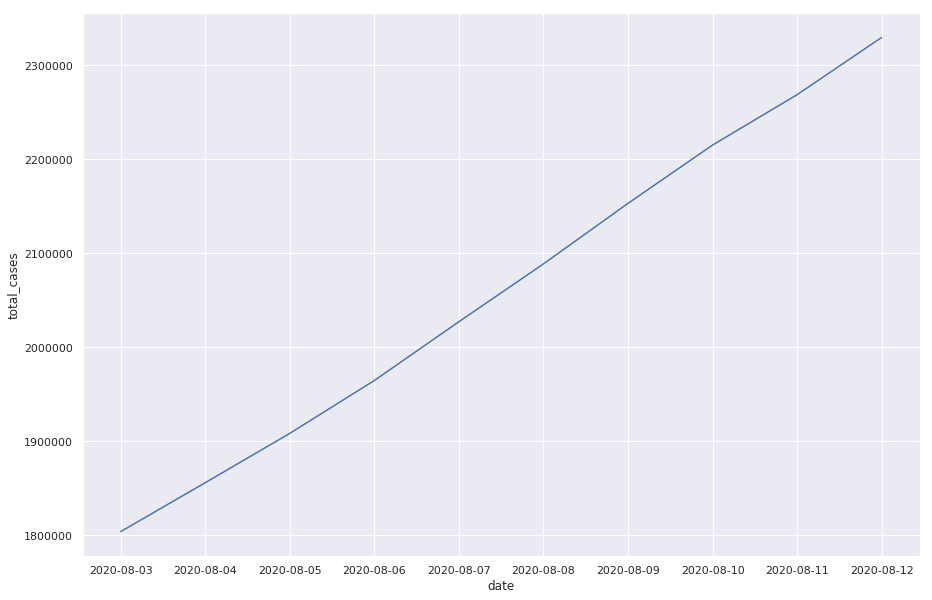

In [13]:
lastmonth_india=india_case.tail(10)
sb.lineplot(x='date',y='total_cases',data=lastmonth_india)
plt.show()

### Visualize total confirmed cases and fatalities

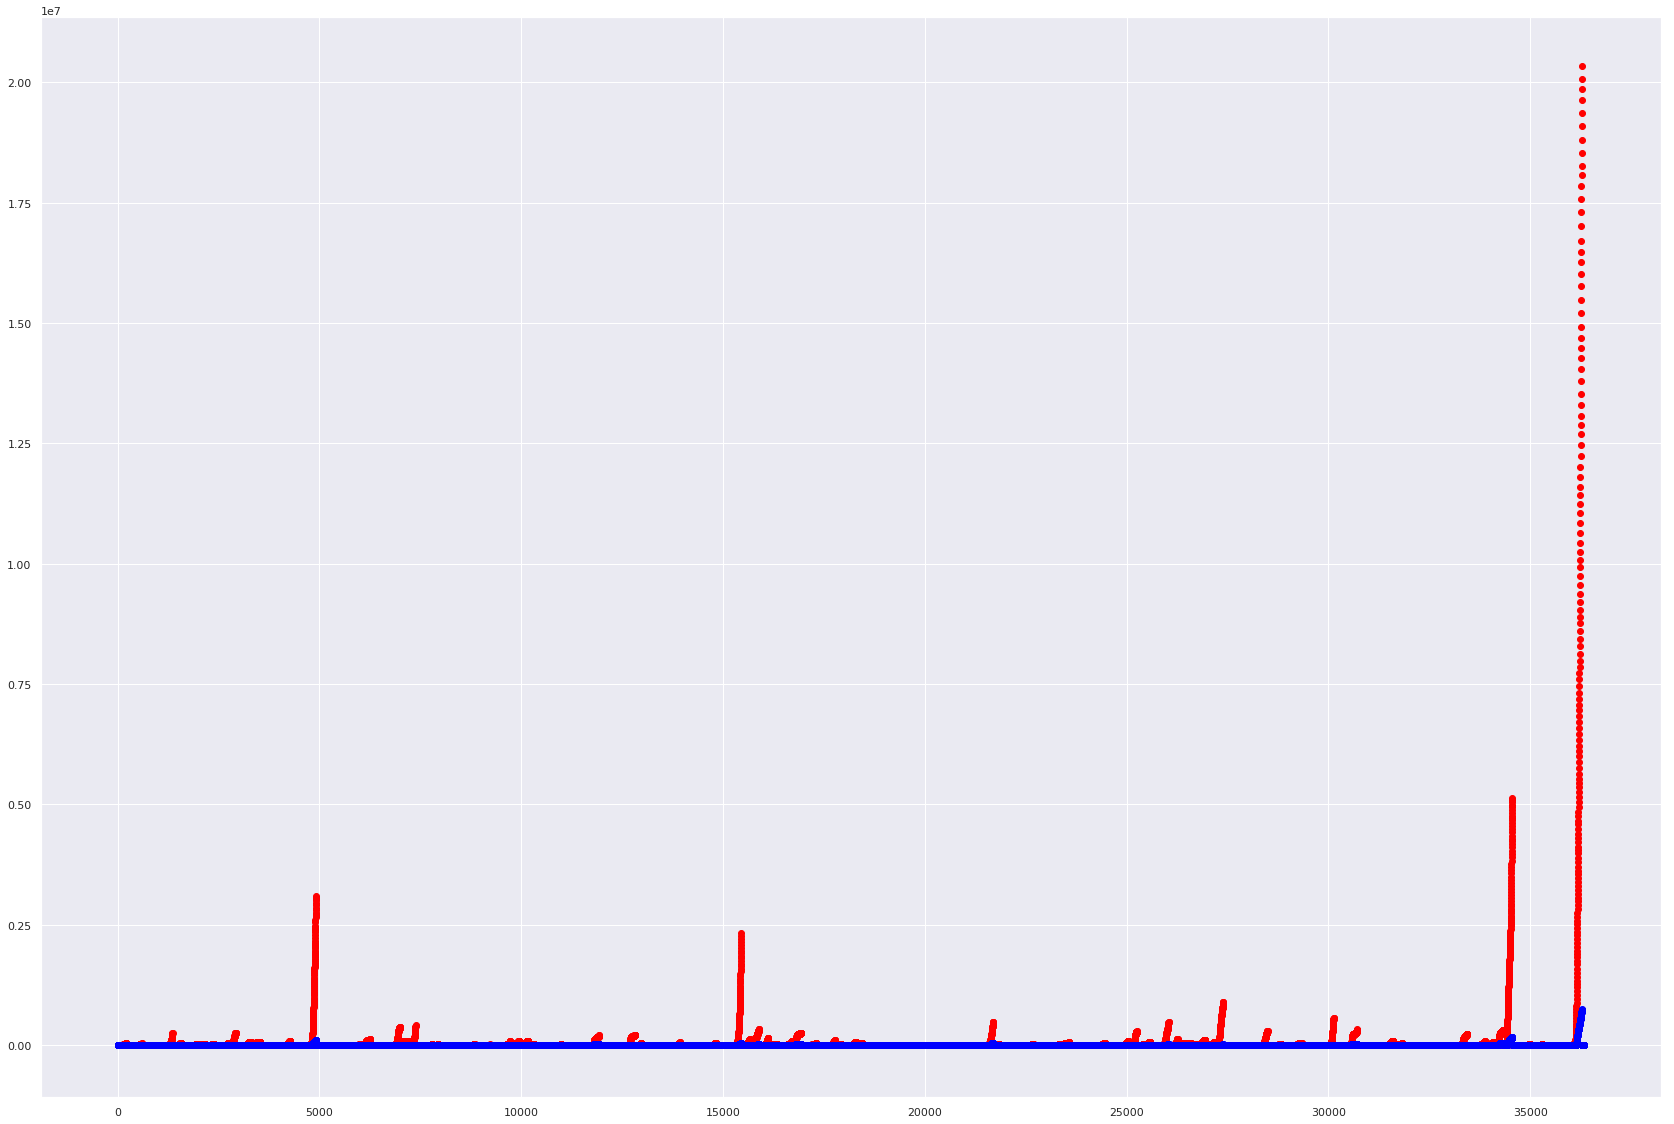

In [14]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1.5, 1.5])
ax.scatter(df.index, df['total_cases'], color='red')
ax.scatter(df.index, df['total_deaths'], color='blue')
plt.show()

### Visualize selected countries total confirmed cases together

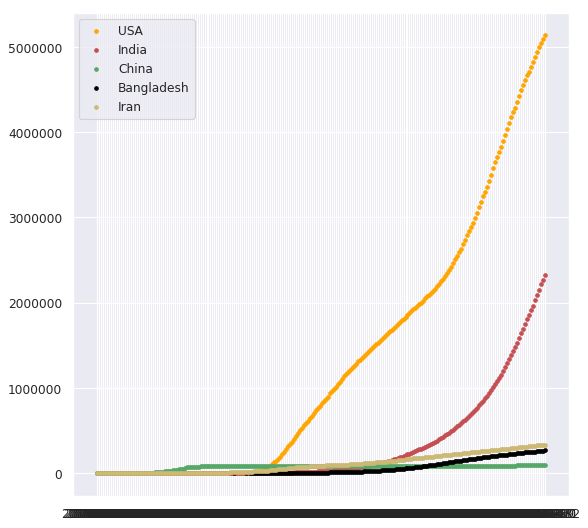

In [29]:
india_case=df[df['location']=='India']
China_case=df[df['location']=='China']
Bangladesh_case=df[df['location']=='Bangladesh']
USA_case=df[df['iso_code']=='USA']
Iran_case=df[df['location']=='Iran']

fig = plt.figure(figsize=(8, 8), dpi=80)
ax1 = fig.add_subplot(111)

ax1.scatter(USA_case['date'], USA_case["total_cases"], s=10, c='orange', label='USA')
ax1.scatter(india_case['date'], india_case["total_cases"], s=10, c='r', label='India')
ax1.scatter(China_case['date'], China_case["total_cases"], s=10, c='g', label='China')
ax1.scatter(Bangladesh_case['date'],Bangladesh_case["total_cases"], s=10, c='black', label='Bangladesh')
ax1.scatter(Iran_case['date'], Iran_case["total_cases"], s=10, c='y', label='Iran')
plt.legend(loc='upper left');
plt.show()

In [39]:

USA_case=df[df['iso_code']=='USA']
china_case=df[df['location']=='China']

### India Vs China Vs USA

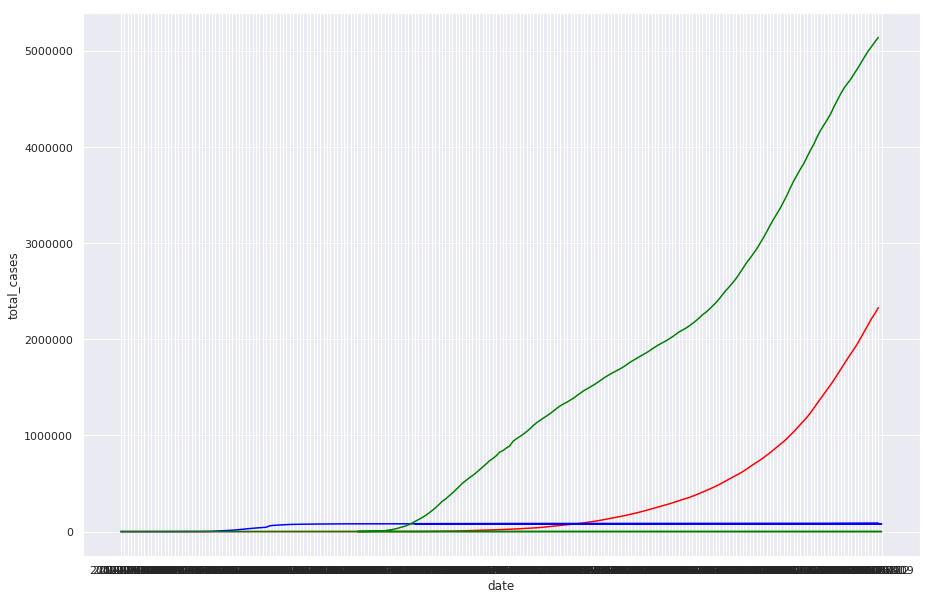

In [40]:
sb.lineplot(x='date',y='total_cases',data=india_case,color='red')
sb.lineplot(x='date',y='total_cases',data=china_case,color='blue')
sb.lineplot(x='date',y='total_cases',data=USA_case,color='green')
plt.show()

In [50]:
last_week_cases=df[df['date']=='2020-08-12']
last_week_cases

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
215,AFG,Asia,Afghanistan,2020-08-12,37269.0,215.0,1344.0,32.0,957.374,5.523,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83
372,ALB,Europe,Albania,2020-08-12,6676.0,140.0,205.0,5.0,2319.828,48.648,...,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57
593,DZA,Africa,Algeria,2020-08-12,36204.0,492.0,1322.0,10.0,825.613,11.220,...,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88
745,AND,Europe,Andorra,2020-08-12,963.0,0.0,52.0,0.0,12463.599,0.000,...,NaN,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73
889,AGO,Africa,Angola,2020-08-12,1679.0,7.0,78.0,3.0,51.086,0.213,...,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15
1028,AIA,North America,Anguilla,2020-08-12,3.0,0.0,0.0,0.0,199.973,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.88
1174,ATG,North America,Antigua and Barbuda,2020-08-12,92.0,0.0,3.0,0.0,939.466,0.000,...,4.631,21490.943,NaN,191.511,13.17,NaN,NaN,NaN,3.800,77.02
1358,ARG,South America,Argentina,2020-08-12,253855.0,7369.0,4785.0,151.0,5616.786,163.046,...,7.441,18933.907,0.6,191.032,5.50,16.200,27.700,NaN,5.000,76.67
1575,ARM,Asia,Armenia,2020-08-12,40593.0,160.0,803.0,7.0,13698.884,53.995,...,7.571,8787.580,1.8,341.010,7.11,1.500,52.100,94.043,4.200,75.09
1718,ABW,North America,Aruba,2020-08-12,717.0,87.0,3.0,0.0,6715.621,814.866,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29


In [55]:
last_day_cases=df[df['date']=='2020-08-12']
last_day_cases

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
215,AFG,Asia,Afghanistan,2020-08-12,37269.0,215.0,1344.0,32.0,957.374,5.523,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83
372,ALB,Europe,Albania,2020-08-12,6676.0,140.0,205.0,5.0,2319.828,48.648,...,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57
593,DZA,Africa,Algeria,2020-08-12,36204.0,492.0,1322.0,10.0,825.613,11.220,...,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88
745,AND,Europe,Andorra,2020-08-12,963.0,0.0,52.0,0.0,12463.599,0.000,...,NaN,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73
889,AGO,Africa,Angola,2020-08-12,1679.0,7.0,78.0,3.0,51.086,0.213,...,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15
1028,AIA,North America,Anguilla,2020-08-12,3.0,0.0,0.0,0.0,199.973,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.88
1174,ATG,North America,Antigua and Barbuda,2020-08-12,92.0,0.0,3.0,0.0,939.466,0.000,...,4.631,21490.943,NaN,191.511,13.17,NaN,NaN,NaN,3.800,77.02
1358,ARG,South America,Argentina,2020-08-12,253855.0,7369.0,4785.0,151.0,5616.786,163.046,...,7.441,18933.907,0.6,191.032,5.50,16.200,27.700,NaN,5.000,76.67
1575,ARM,Asia,Armenia,2020-08-12,40593.0,160.0,803.0,7.0,13698.884,53.995,...,7.571,8787.580,1.8,341.010,7.11,1.500,52.100,94.043,4.200,75.09
1718,ABW,North America,Aruba,2020-08-12,717.0,87.0,3.0,0.0,6715.621,814.866,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29


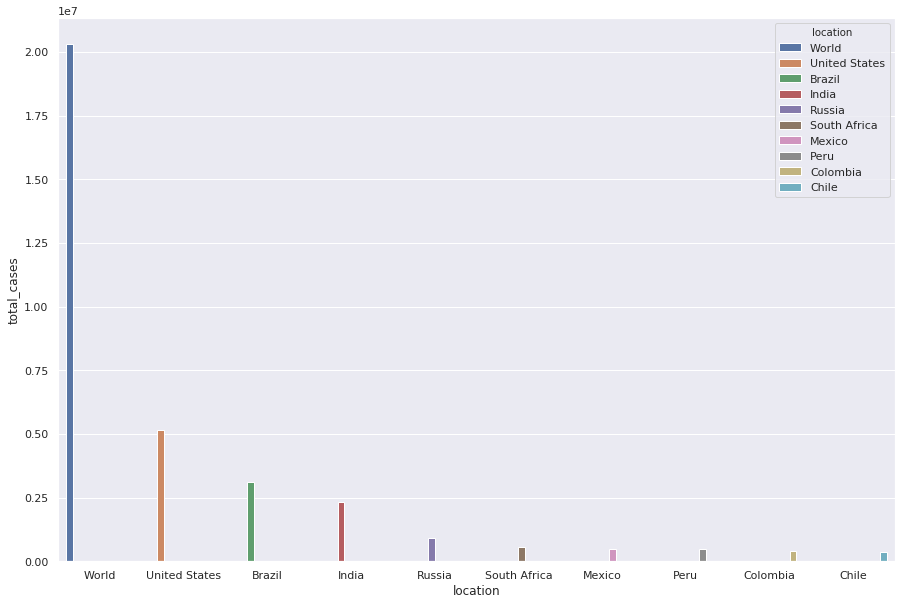

In [56]:
max_case_countries=last_day_cases.sort_values(by='total_cases',ascending=False)
max_case_countries.loc[:,['location','total_cases']].head(10)
sb.barplot(x='location',y='total_cases',data=max_case_countries[:10],hue='location')
plt.show()

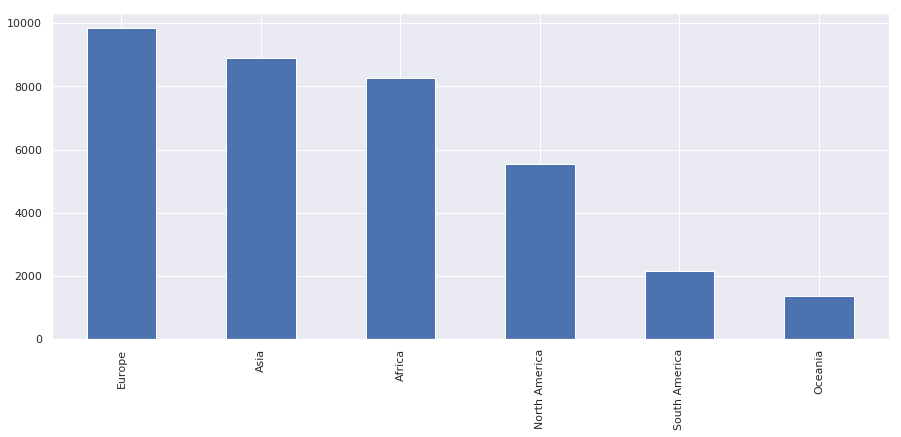

In [31]:
df['continent'].value_counts().plot(kind='bar', figsize=(15,6))
plt.show()

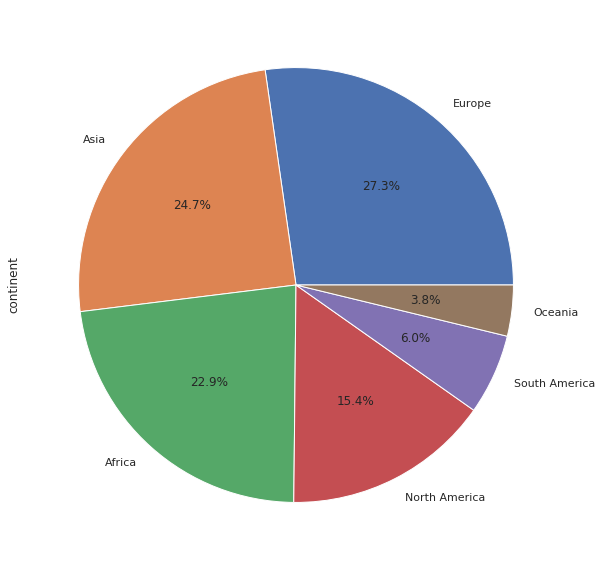

In [32]:
plt.figure(figsize=(15,10))
df['continent'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In [33]:
!pip install geopandas

     |████████████████████████████████| 972kB 7.7MB/s eta 0:00:01
     |████████████████████████████████| 10.9MB 43.4MB/s eta 0:00:01
     |████████████████████████████████| 14.7MB 22.2MB/s eta 0:00:01
     |████████████████████████████████| 1.0MB 41.8MB/s eta 0:00:01


In [36]:
from shapely.geometry import Point, Polygon
 
import geopandas as gpd

In [32]:
! pip install descartes


In [33]:
import descartes

In [26]:
dir(gpd)

['GeoDataFrame',
 'GeoSeries',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_compat',
 '_config',
 '_vectorized',
 '_version',
 'array',
 'base',
 'clip',
 'datasets',
 'geodataframe',
 'geopandas',
 'geoseries',
 'gpd',
 'io',
 'np',
 'options',
 'overlay',
 'pd',
 'plotting',
 'points_from_xy',
 'read_feather',
 'read_file',
 'read_parquet',
 'read_postgis',
 'show_versions',
 'sindex',
 'sjoin',
 'tools']

(-197.99999999999997, 198.00000000000006, -98.68225649999998, 92.3273865)

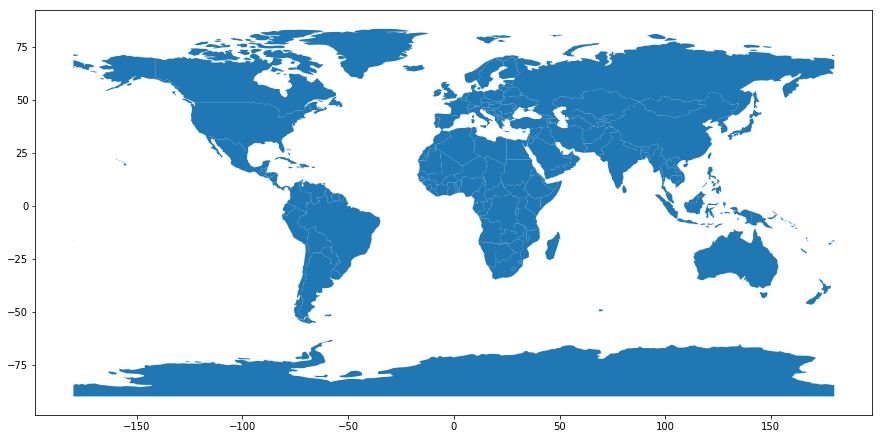

In [34]:
world = gpd.read_file( gpd.datasets.get_path('naturalearth_lowres') )
ax = world.plot( figsize=(15, 13) )
ax.axis('on')

In [46]:
url2='https://raw.githubusercontent.com/safizaidi98/Corona-Virus-Outbreak-Data-Analysis/master/data/coronavirus_clean_data.csv'


In [47]:
df2=pd.read_csv(url2)

In [49]:
gdf01 = gpd.GeoDataFrame( df2, geometry = gpd.points_from_xy( df2['Long'], df2['Lat'] ) )

In [50]:
gdf01.head()

,Unnamed: 0,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.22640 31.82570)
1,1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.41420 40.18240)
2,2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.87400 30.05720)
3,3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.98740 26.07890)
4,4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.83430 36.06110)


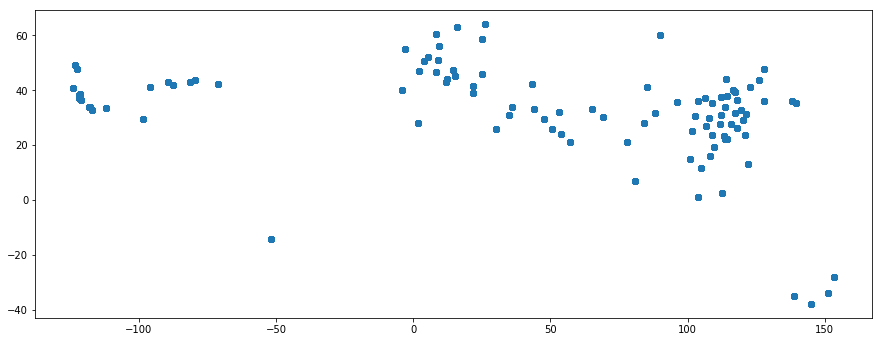

In [51]:
gdf01.plot( figsize=(15, 6) )
plt.show()

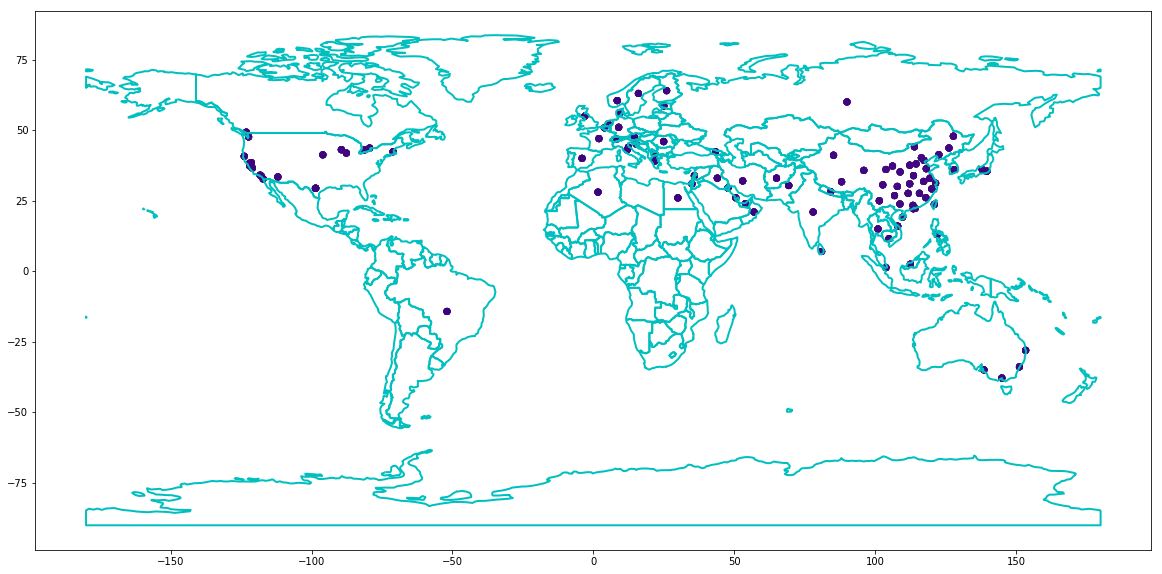

In [52]:
fig, ax = plt.subplots( figsize=(20, 10) )
gdf01.plot(cmap = 'Purples', ax = ax)
world.geometry.boundary.plot(color = None, edgecolor = 'c', linewidth = 2, ax = ax) #here edgecolor = 'k' in the tutorial
plt.show()

In [56]:
df2['Cases_date'] = pd.to_datetime( df2['Date'] )
df2.dtypes

Unnamed: 0                 int64
Province_State            object
Country_Region            object
Lat                      float64
Long                     float64
Date                      object
Confirmed                  int64
Deaths                     int64
Recovered                  int64
geometry                geometry
Cases_date        datetime64[ns]
dtype: object

In [57]:
ts = df2.set_index('Cases_date')
df2_by_date = ts.groupby('Cases_date').sum().reset_index(drop = None)
df2_by_date

,Cases_date,Unnamed: 0,Lat,Long,Confirmed,Deaths,Recovered
0,2020-01-22,5460,3386.46002,4806.4548,555,17,28
1,2020-01-23,16485,3386.46002,4806.4548,653,18,30
2,2020-01-24,27510,3386.46002,4806.4548,941,26,36
3,2020-01-25,38535,3386.46002,4806.4548,1434,42,39
4,2020-01-26,49560,3386.46002,4806.4548,2118,56,52
5,2020-01-27,60585,3386.46002,4806.4548,2927,82,61
6,2020-01-28,71610,3386.46002,4806.4548,5578,131,107
7,2020-01-29,82635,3386.46002,4806.4548,6166,133,126
8,2020-01-30,93660,3386.46002,4806.4548,8234,171,143
9,2020-01-31,104685,3386.46002,4806.4548,9927,213,222


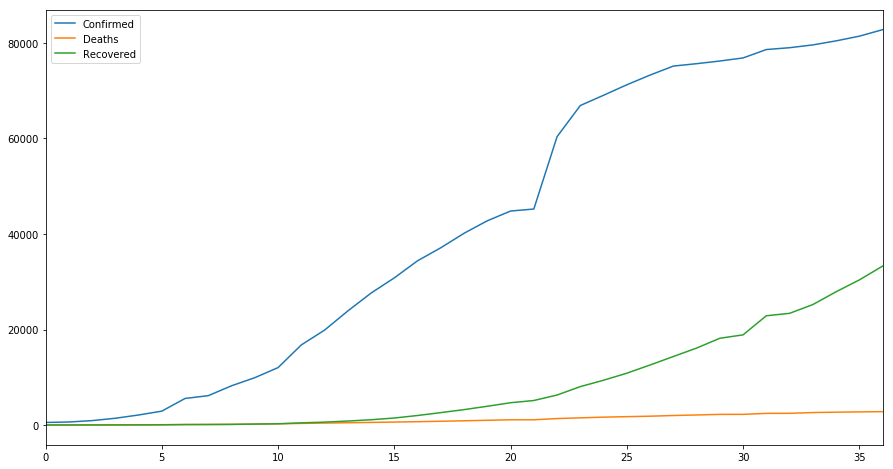

In [58]:
df2_by_date[ ['Confirmed', 'Deaths', 'Recovered'] ].plot(kind = 'line', figsize = (15, 8))

In [34]:
india_case['date']=pd.to_datetime(india_case['date'])
india_case['date']=india_case['date'].map(dt.datetime.toordinal)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [35]:
india_case['stringency_index'].head()

15223    NaN
15224    0.0
15225    0.0
15226    0.0
15227    0.0
Name: stringency_index, dtype: float64

In [36]:

india_case['new_tests'].fillna(method='ffill' or 'bfill' , inplace=True)
india_case['total_tests'].fillna(method='ffill' or 'bfill' , inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [37]:
india_case['new_tests'].fillna(0, inplace=True)
india_case['total_tests'].fillna(0, inplace=True)

In [38]:
india_case.describe()

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
count,225.000000,2.250000e+02,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,...,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02
mean,737536.693333,3.098122e+05,10353.946667,7603.977778,204.848889,224.500849,7.502831,5.510116,0.148431,113576.924444,...,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
std,65.465771,5.471773e+05,16757.036761,12115.987009,296.861837,396.504043,12.142720,8.779670,0.215095,160894.139642,...,9.791746e-15,3.190329e-11,8.901588e-14,7.975822e-13,2.314413e-14,6.676191e-15,1.424254e-14,1.993956e-13,8.901588e-16,1.139403e-13
min,737424.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
25%,737480.000000,3.000000e+00,0.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,0.000000,...,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
50%,737537.000000,1.998400e+04,1396.000000,640.000000,43.000000,14.481000,1.012000,0.464000,0.031000,32167.000000,...,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
75%,737593.000000,3.540650e+05,11929.000000,11903.000000,357.000000,256.568000,8.644000,8.625000,0.259000,151808.000000,...,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
max,737649.000000,2.329638e+06,64399.000000,46091.000000,2003.000000,1688.138000,46.666000,33.399000,1.451000,719364.000000,...,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01


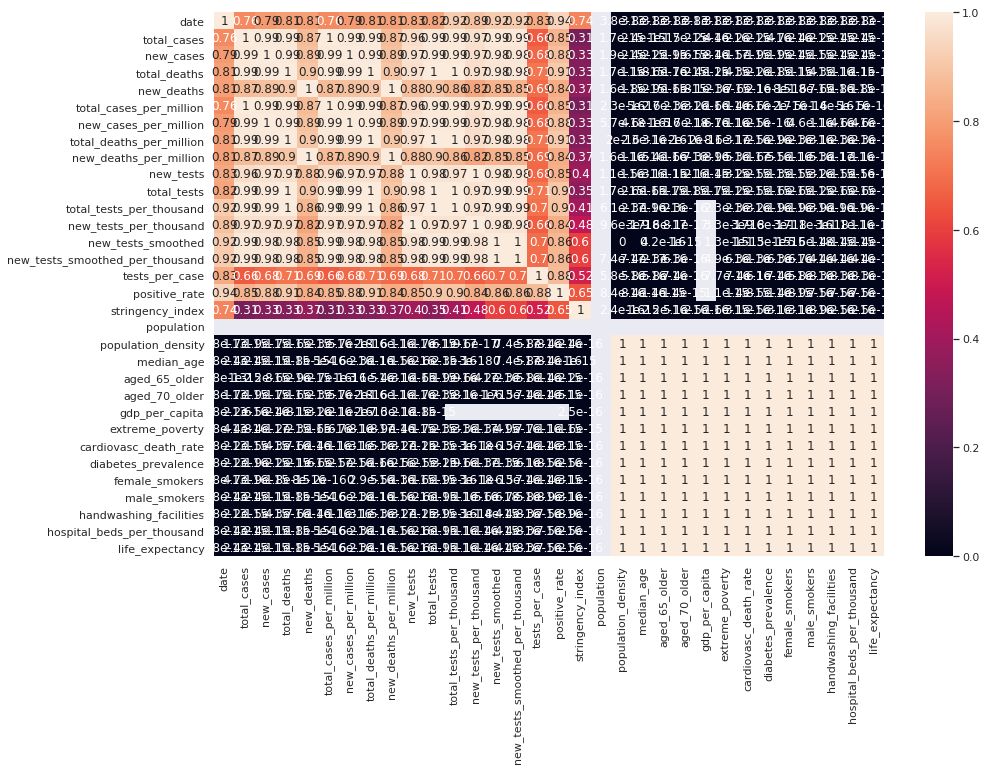

In [39]:
sb.heatmap(india_case.corr().abs(),annot=True)

In [117]:

india_case.isnull().sum()

iso_code                            0
continent                           0
location                            0
date                                0
total_cases                         0
new_cases                           0
total_deaths                        0
new_deaths                          0
total_cases_per_million             0
new_cases_per_million               0
total_deaths_per_million            0
new_deaths_per_million              0
new_tests                          92
total_tests                        86
total_tests_per_thousand           86
new_tests_per_thousand             92
new_tests_smoothed                 81
new_tests_smoothed_per_thousand    81
tests_per_case                     81
positive_rate                      81
tests_units                        74
stringency_index                    6
population                          0
population_density                  0
median_age                          0
aged_65_older                       0
aged_70_olde